## Projektna naloga

Podatkovno rudarjenje, naloga, `DATUM`  
**`Metod Zupančič`**

### Podatki

### Vprašanja

#### 31.3.2020
1. Keri filmi so najboljši?
2. Predstavitev žanrov, histogram žanrov - Metod
3. Nek scatter plot, cena v odvisnosti od časa +dodatno(odvisnosti na karkoli drugega zanimivega)
4. Najbolj popularni developerji



In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

description = pd.read_csv("Data/steam_description_data.csv")
media = pd.read_csv("Data/steam_media_data.csv")
requirements = pd.read_csv("Data/steam_requirements_data.csv")
support = pd.read_csv("Data/steam_support_info.csv")
steam = pd.read_csv("Data/steam.csv")
tag = pd.read_csv("Data/steamspy_tag_data.csv")

In [2]:
def izpisPrvih5(vnos):
    stevec = 0
    for element in vnos:
        if(stevec < 5):
            print(element)
        else:
            break
        stevec+=1
    print()

### 2. Predstavitev žanrov, histogram žanrov - Metod

In [9]:
import re

steam = pd.read_csv("Data/steam.csv")
genres = dict()


#Brez omejevanja po lastništvu
for vnos in steam.genres:
    for x in vnos.split(";"):
        if x not in genres:
            genres[x] = 1
        else:
            genres[x] += 1

genres = dict(sorted(genres.items(), key=lambda k: -k[1]))



omejeno = steam.loc[~steam['owners'].str.contains('^0-', regex=True)]
genresLimited = dict()


for vnos in omejeno.genres:
    for x in vnos.split(";"):
        if x not in genresLimited:
            genresLimited[x] = 1
        else:
            genresLimited[x] += 1
genresLimited = dict(sorted(genresLimited.items(), key=lambda k: -k[1]))

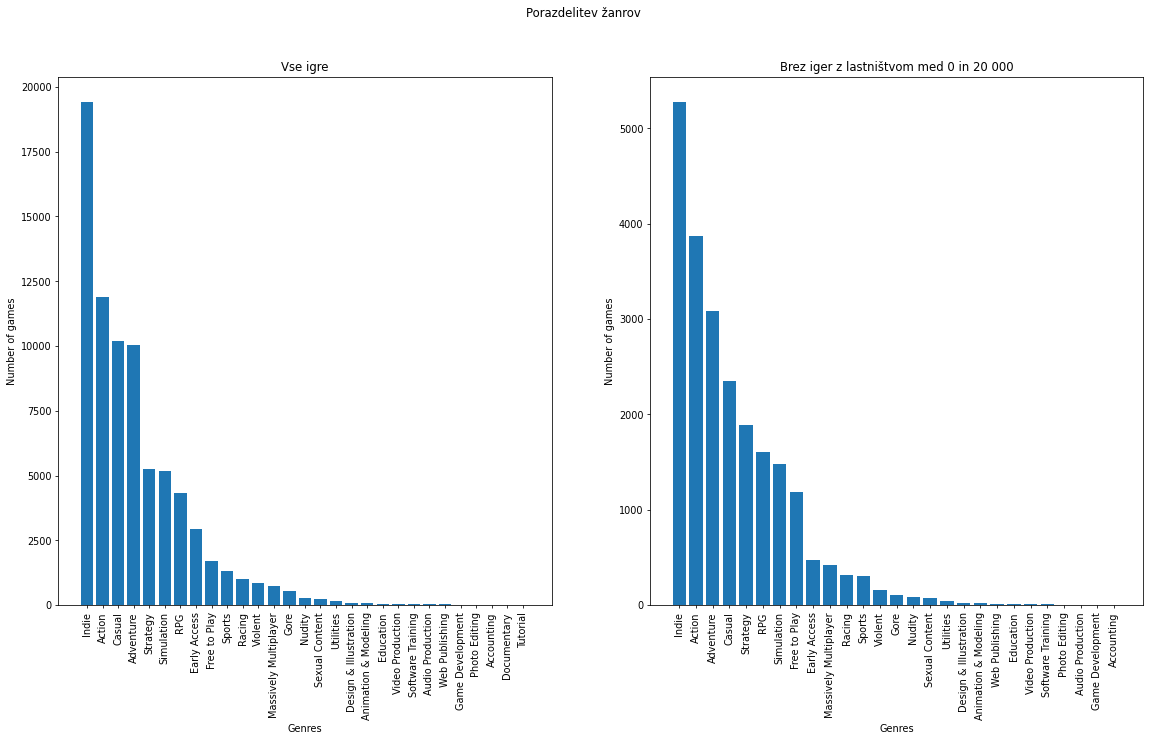

In [13]:
import matplotlib.pyplot as plt
zaVizualizacijo = {k: v for k, v in sorted(genres.items(), key=lambda item: -item[1])}
plt.figure(num=None, figsize=(20,10), dpi=70, facecolor='w', edgecolor='k')
plt.suptitle("Porazdelitev žanrov")
plt.subplot(1,2,1)
plt.bar(range(len(genres)), list(genres.values()), align='center')
plt.xticks(range(len(genres)), list(genres.keys()),rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of games")
plt.title("Vse igre")

plt.subplot(1,2,2)
zaVizualizacijo = {k: v for k, v in sorted(genresLimited.items(), key=lambda item: -item[1])}
#plt.figure(num=None, figsize=(20,10), dpi=70, facecolor='w', edgecolor='k')
plt.bar(range(len(genresLimited)), list(genresLimited.values()), align='center')
plt.xticks(range(len(genresLimited)), list(genresLimited.keys()),rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of games")
plt.title("Brez iger z lastništvom med 0 in 20 000")
plt.show()

In [6]:
#ZAPISKI RANDOM
# Inplace=true  je da ne rabiš delat steam = (popravljen steam)
# Negacija je ~
# za uporabo regexa importaj modul re, dodaten flag za velika male = flag=Re.I -> Ignore case
import re
steam = pd.read_csv("Data/steam.csv")
steam = steam.loc[~steam['owners'].str.contains('^0-', regex=True)]